In [101]:
#importing 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
df = pd.read_csv("02-Load_Boston.csv")

In [103]:
df.shape

(506, 15)

In [104]:
df.drop('Unnamed: 0',axis = 1,inplace = True)

In [105]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [106]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
TARGET     0
dtype: int64

In [108]:
df.head(2)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.9,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.9,9.14,21.6


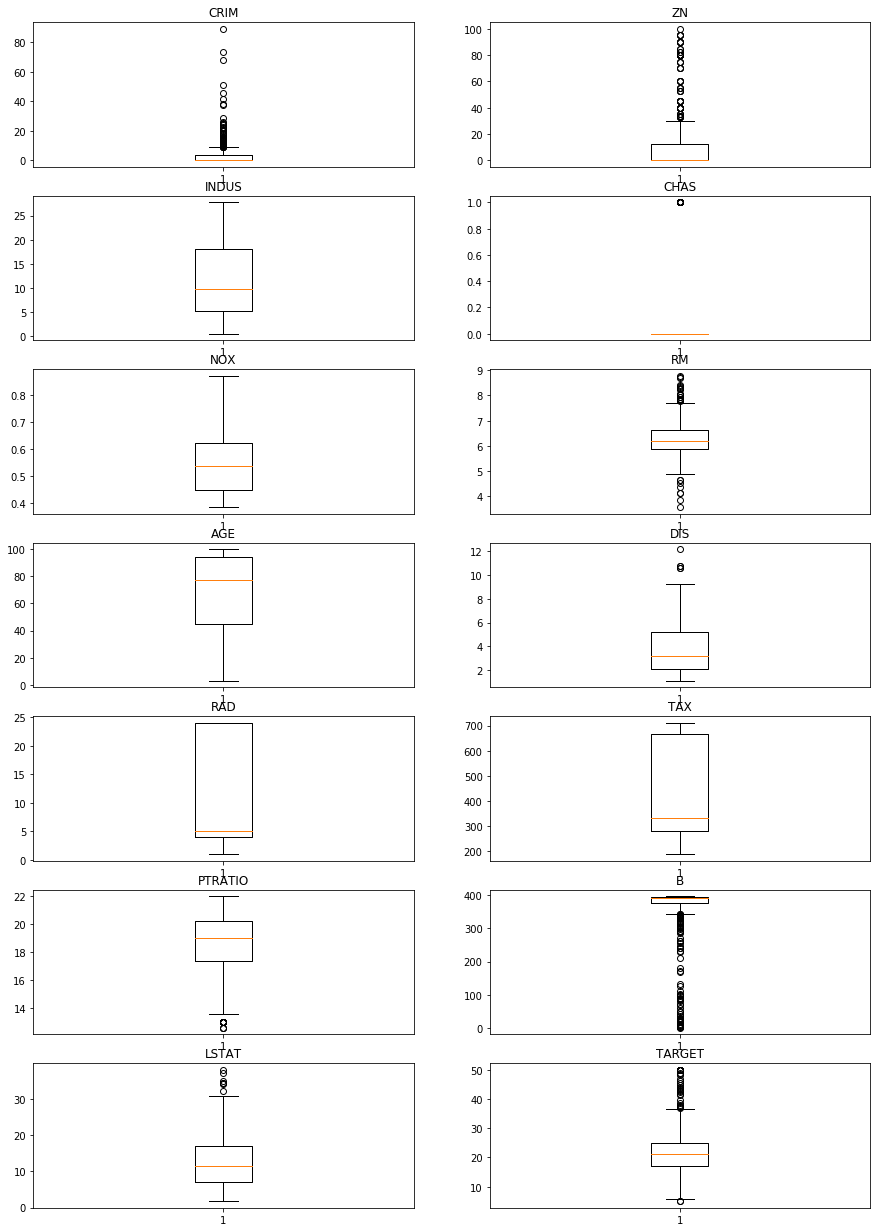

In [109]:
#checking for outliers in numerical columns
plt.figure(figsize=(15,25))
count=1
for col in df.columns:
    if(df[col].dtype!='O'):
        plt.subplot(8,2,count)
        plt.boxplot(df[col])
        plt.title(col)
        count +=1
plt.show()

In [110]:
#removing outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [111]:
dp=[0,1,5,7,10,11,12,13]
for col in df.columns[dp]:
    df = remove_outlier(df,col)
    print(col)

CRIM
ZN
RM
DIS
PTRATIO
B
LSTAT
TARGET


In [112]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,TARGET
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1


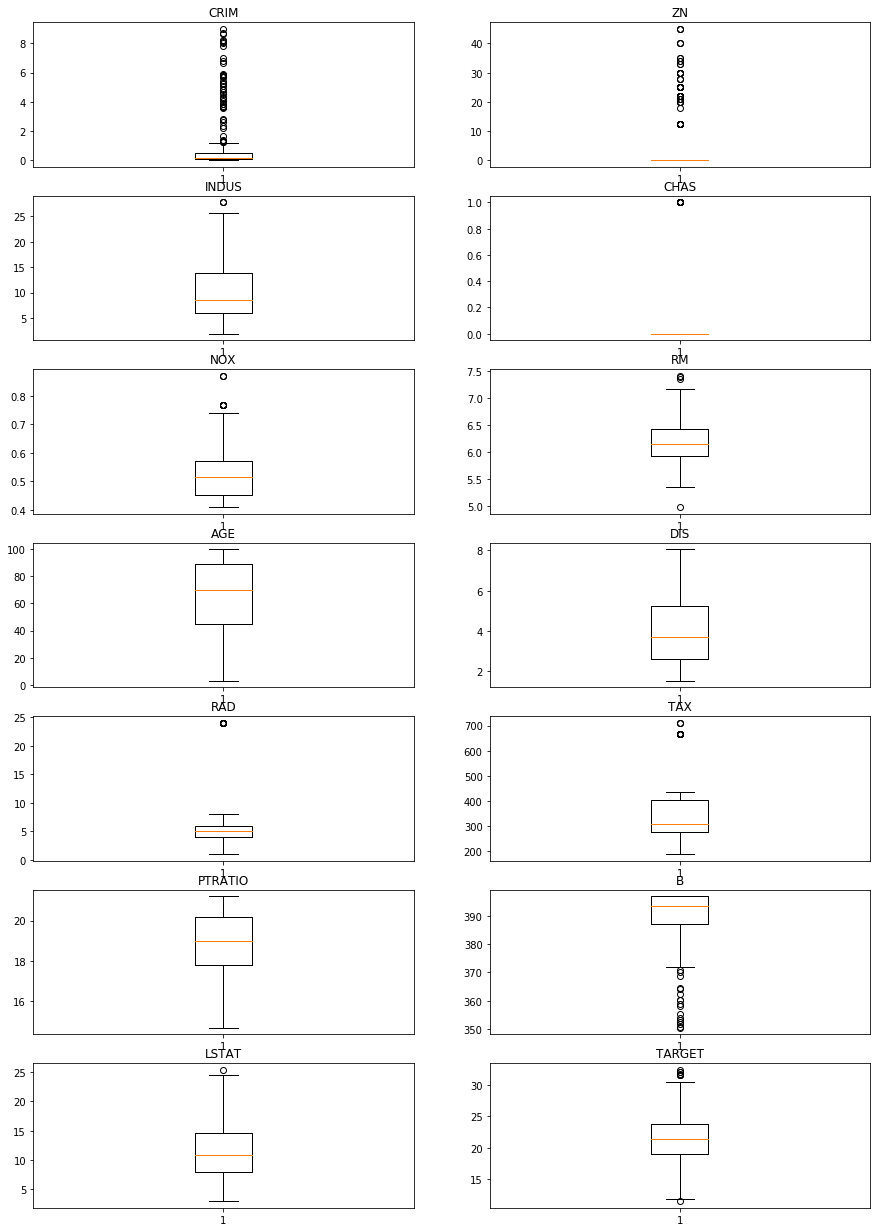

In [113]:
#box plot after removing outliers
plt.figure(figsize=(15,25))
count=1
for col in df.columns:
    if(df[col].dtype!='O'):
        plt.subplot(8,2,count)
        plt.boxplot(df[col])
        plt.title(col)
        count +=1
plt.show()

In [114]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1].values 

In [115]:
print(x.shape,x.dtype)
print(y.shape,y.dtype)

(277, 13) float64
(277,) float64


In [116]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 0)

In [117]:
#creating linear regration model
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [118]:
y_prd=model.predict(x_test)

In [119]:
from sklearn.metrics import r2_score
r2_score(y_test,y_prd)

0.752694638809098